In [1]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

In [2]:
df = pd.read_csv('C:/Users/ghom9/Downloads/AAME.csv')  # CSV 파일 경로
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.00,4.05,3.85,3.85,3.213167,15000
1,1980-03-18,0.00,4.00,3.80,3.80,3.171437,10200
2,1980-03-19,0.00,4.05,3.85,3.85,3.213167,33500
3,1980-03-20,0.00,4.00,3.80,3.80,3.171437,8700
4,1980-03-21,0.00,3.95,3.75,3.75,3.129709,12700
...,...,...,...,...,...,...,...
10093,2020-03-26,2.29,2.29,2.08,2.28,2.280000,1600
10094,2020-03-27,2.25,2.25,2.21,2.25,2.250000,500
10095,2020-03-30,2.25,2.25,2.13,2.13,2.130000,400
10096,2020-03-31,2.11,2.11,2.11,2.11,2.110000,300


In [3]:
df = df[['Open', 'High', 'Low', 'Close']]
df = df[df['Open'] != 0]
df.dropna(inplace=True)

df

,Open,High,Low,Close
66,3.80,3.80,3.80,3.80
71,3.50,3.50,3.50,3.50
72,3.50,3.50,3.50,3.50
118,4.60,4.60,4.60,4.60
194,5.25,5.25,5.25,5.25
...,...,...,...,...
10093,2.29,2.29,2.08,2.28
10094,2.25,2.25,2.21,2.25
10095,2.25,2.25,2.13,2.13
10096,2.11,2.11,2.11,2.11


In [4]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [5]:
def make_sequences(data, window):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window, :3])  # Open, Low, High
        y.append(data[i+window, 3])     # Close
    return np.array(X), np.array(y)

In [6]:
window = 10
X, y = make_sequences(scaled_data, window)
X.shape, y.shape

((8516, 10, 3), (8516,))

In [7]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6812, 10, 3), (1704, 10, 3), (6812,), (1704,))

In [10]:
model = Sequential()
model.add(LSTM(16, input_shape=(window, 3), activation='tanh'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 16)                  │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,297 (5.07 KB)

 Trainable params: 1,297 (5.07 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0086 - val_loss: 1.5508e-04
Epoch 2/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 3.0297e-04 - val_loss: 1.2474e-04
Epoch 3/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 2.7859e-04 - val_loss: 1.1712e-04
Epoch 4/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.8880e-04 - val_loss: 1.0619e-04
Epoch 5/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2.0798e-04 - val_loss: 1.1428e-04
Epoch 6/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.8513e-04 - val_loss: 1.1045e-04
Epoch 7/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.7346e-04 - val_loss: 9.1835e-05
Epoch 8/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.5305e-04 - val_loss: 9.0514e-05
Epoch 9/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.8130e-04 - val_loss: 8.9318e-05
Epoch 10/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.5914e-04 - val_loss: 1.1133e-04
Epoch 11/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.

In [12]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f" MSE: {mse:.6f}")

54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
 MSE: 0.000211


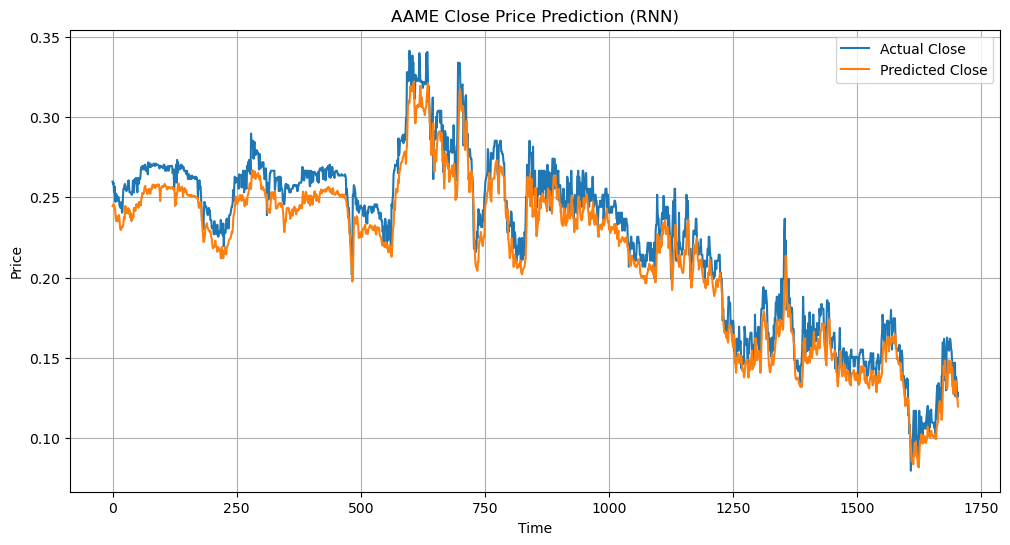

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Close')
plt.plot(y_pred, label='Predicted Close')
plt.title('AAME Close Price Prediction (RNN)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()